In [7]:
import torch
import torch.nn as nn
import torchaudio.transforms as AT
import h5py
import matplotlib.pyplot as plt

In [9]:
f = h5py.File('data/head/head-dataset-1266.hdf5', 'r')

In [10]:
X_train = f['X_train'][()]
X_valid = f['X_valid'][()]
Y_train = f['Y_train'][()]
Y_valid = f['Y_valid'][()]

In [11]:
X_train.shape

(175674, 18)

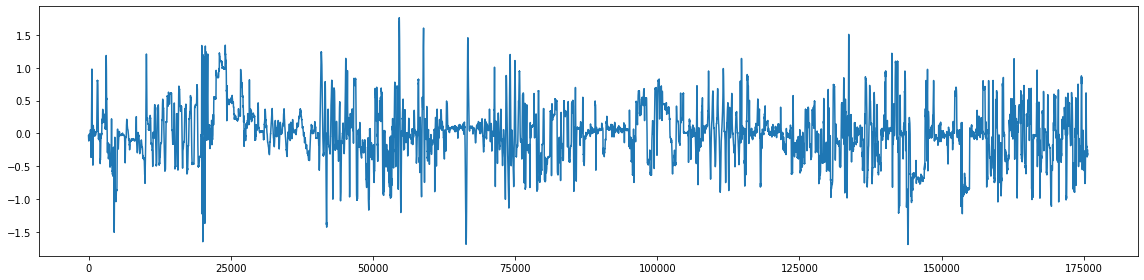

In [70]:
plt.figure(figsize=(16, 4))
plt.plot(X_train[:, 0])
plt.tight_layout()
plt.show()

# 기존 데이터셋 문제점

cropping이나 interpolation에서 잘못된게 있는 듯.

diff가 1, -1에 가까운 값들이 가끔 발생함.

현실적으로 1tick만에 60도에 가깝게 그렇게 크게 고개를 움직이는건 무리라고 생각됨

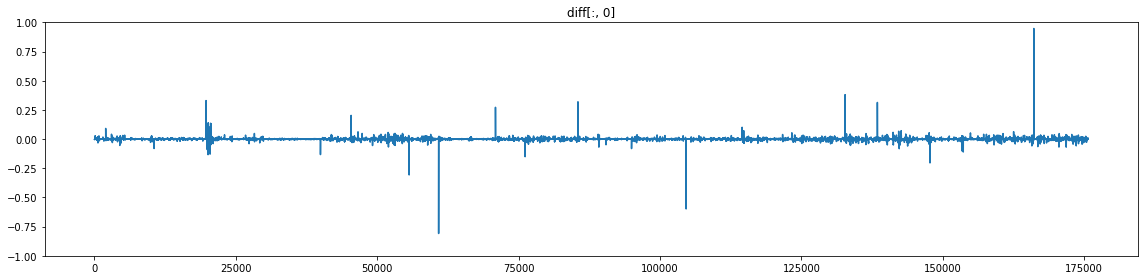

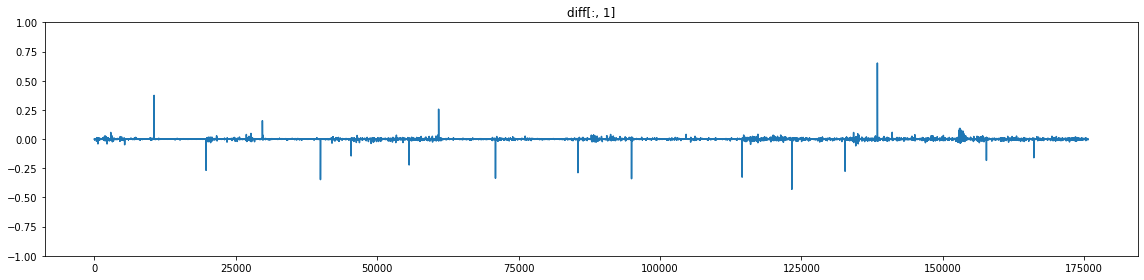

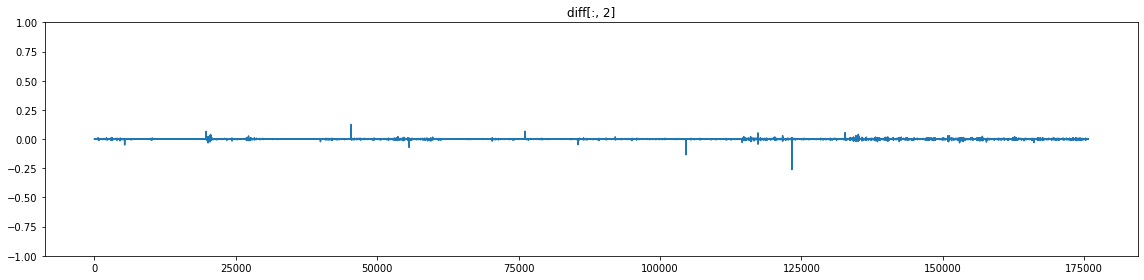

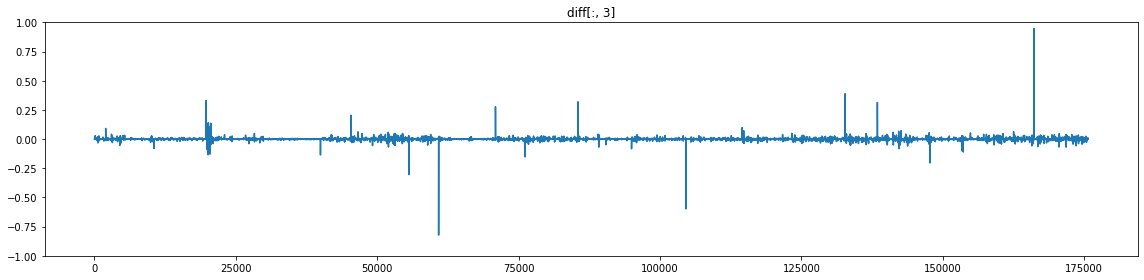

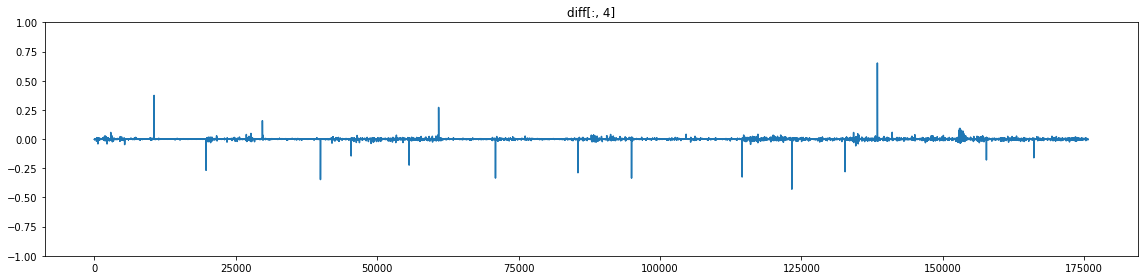

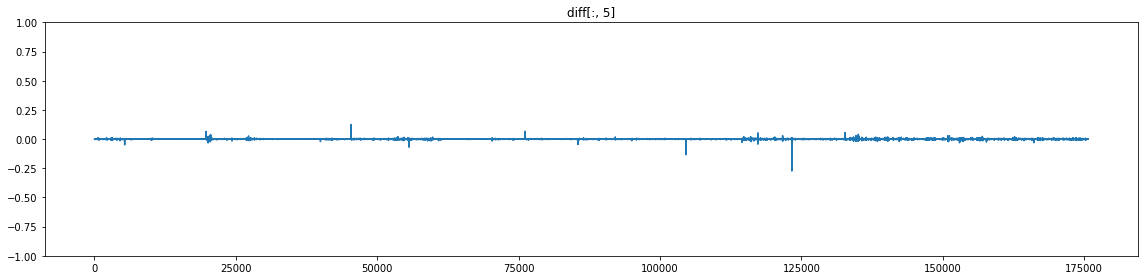

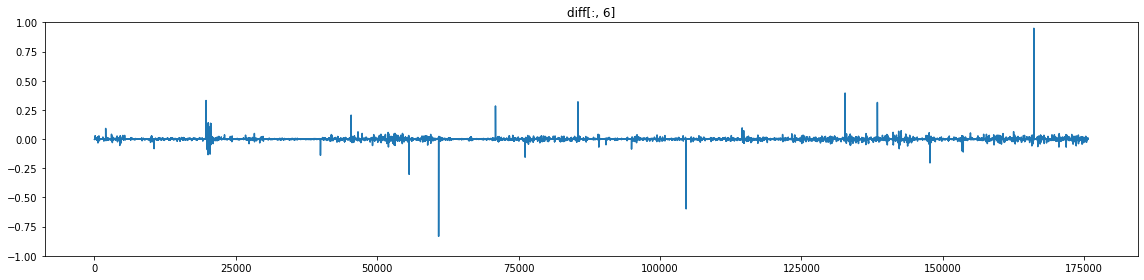

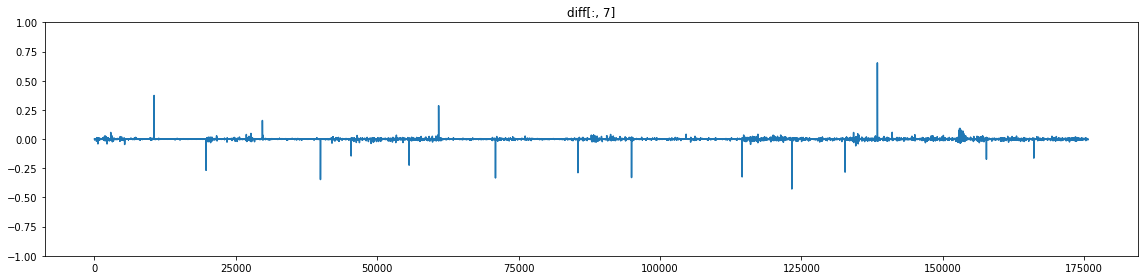

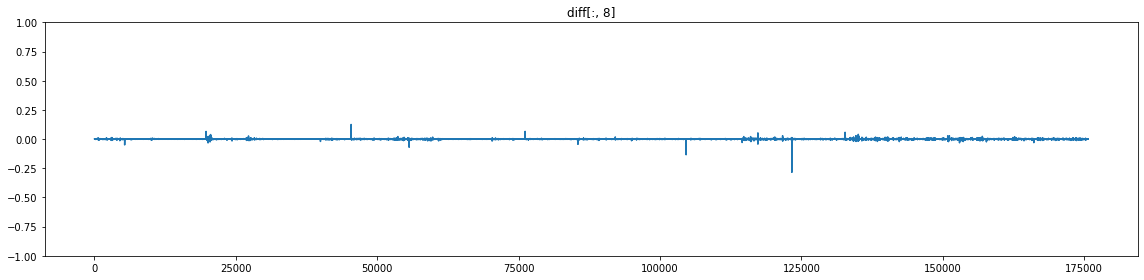

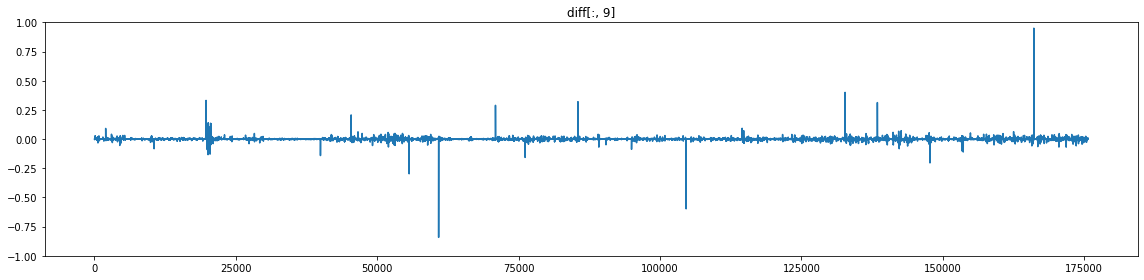

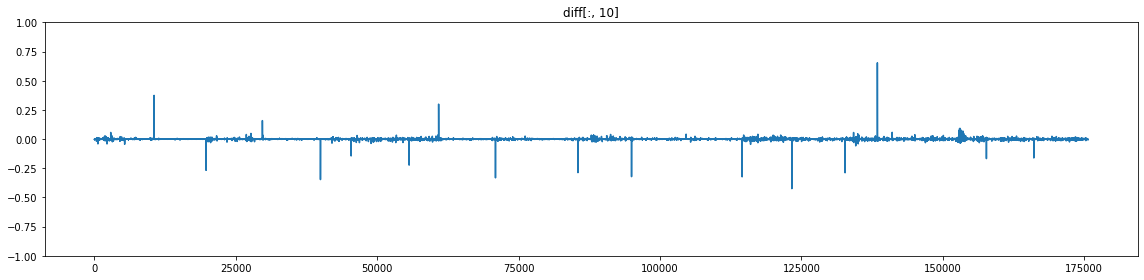

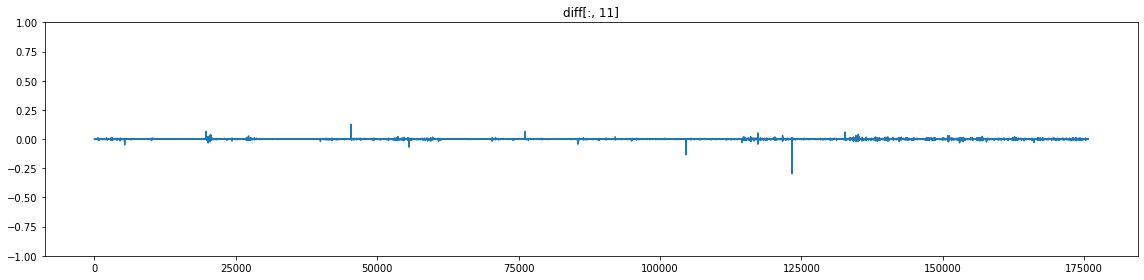

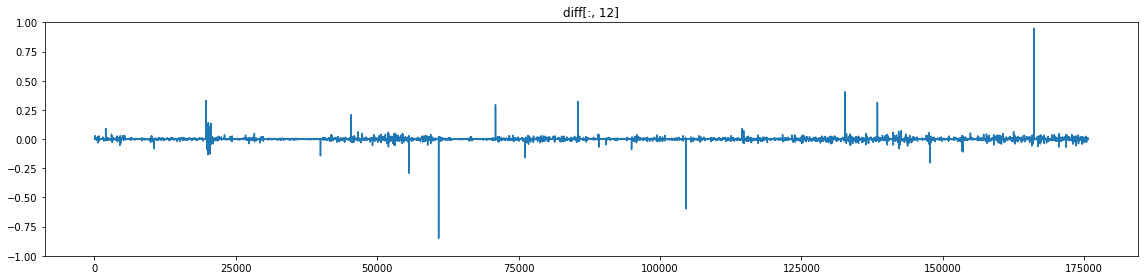

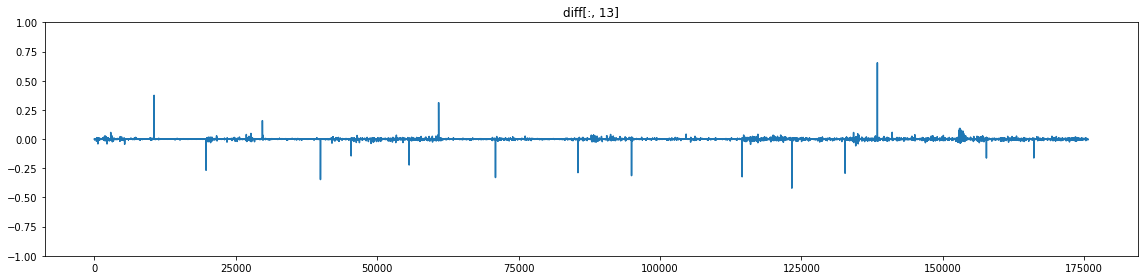

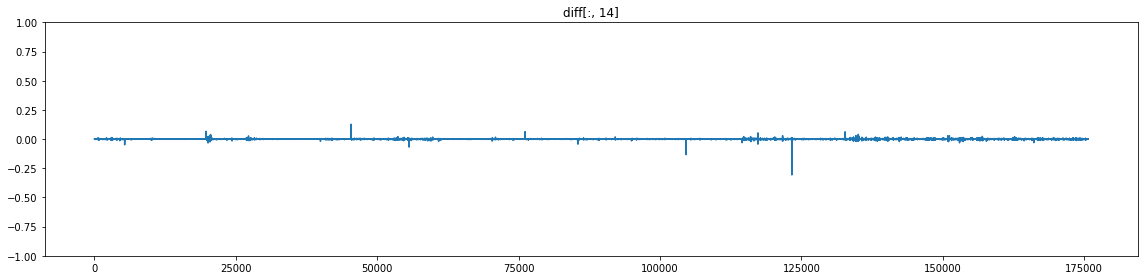

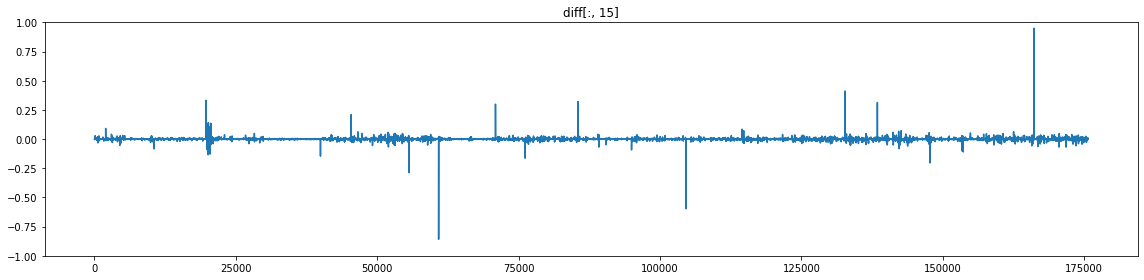

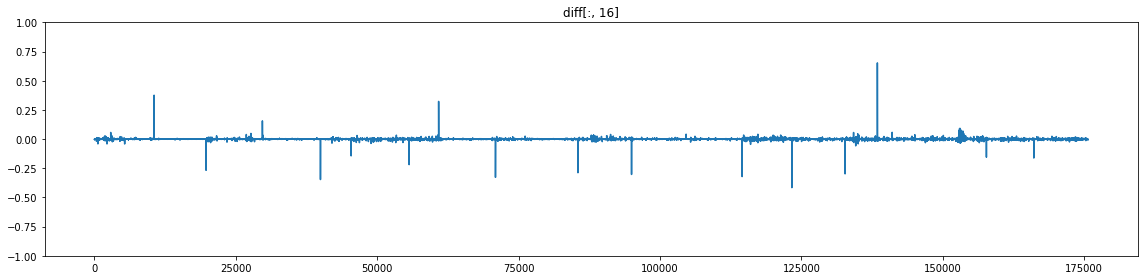

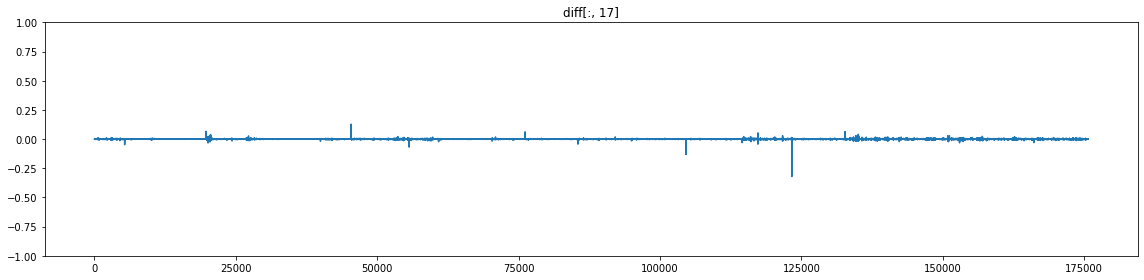

In [81]:
diff = X_train[1:] - X_train[:-1]
for i in range(diff.shape[1]):
    plt.figure(figsize=(16, 4))
    plt.plot(diff[:, i])
    plt.ylim(-1, 1)
    plt.title(f'diff[:, {i}]')
    plt.tight_layout()
    plt.show()

In [79]:
diff.max(), diff.min()

(0.9505099201806498, -0.8582147101755768)

In [66]:
spectrogram = AT.Spectrogram(n_fft=640, win_length=640, hop_length=640, power=0.01, normalized=False)

In [67]:
s = torch.tensor(X_train[:, 0], dtype=torch.float32).unsqueeze(0)

In [68]:
spec = spectrogram(s)

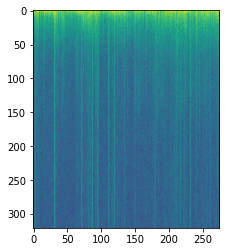

In [69]:
#plt.figure(figsize=(16, 4))
plt.imshow(spec[0])
#plt.tight_layout()
plt.show()

In [50]:
s.shape, spec.shape

(torch.Size([1, 175674]), torch.Size([1, 321, 29280]))